In [11]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage import data

In [14]:
camera = data.camera()
camera # data type is unassigned int with 8 bit 

array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [16]:
type(camera)

numpy.ndarray

In [19]:
camera.shape # px

(512, 512)

In [21]:
camera.size

262144

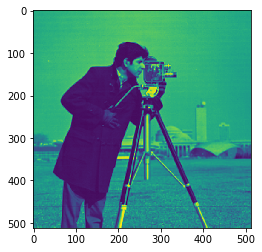

In [23]:
plt.imshow(camera)

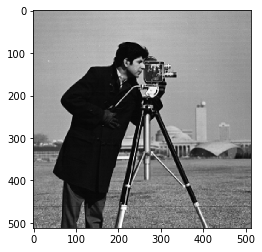

In [26]:
plt.imshow(camera, 'gray')

In [31]:
camera.min() #minimum intensity of pic

0

In [33]:
camera.max() #max intensity of image is 255 bytes

255

In [78]:
camera.mean() #mean intensity of camera image

118.31400299072266

In [80]:
# get pixel from 3rd row and 10th column of camera image
camera[3,10]

160

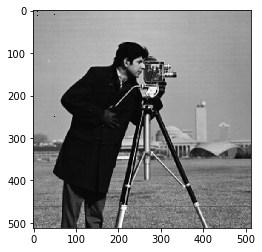

In [93]:
# Change the pixel value of the camera image
camera[10,50] = 0 #notice the black dot on image
plt.imshow(camera,'gray')

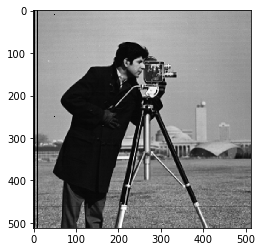

In [96]:
# Set whole row and 1 column in black
camera[:,10] = 0 #notice the black line in 10th column on image
plt.imshow(camera,'gray')

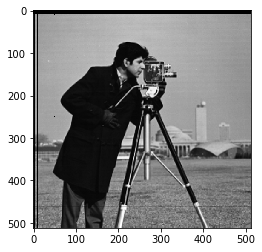

In [99]:
camera[:10] = 0 #Notice a black line from 0 to 9th row.
plt.imshow(camera,'gray')

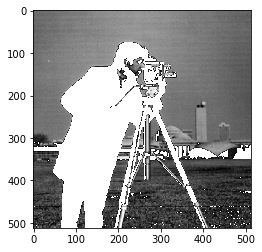

In [111]:
# I am loading the fresh image once again as I changed it a lot
camera = data.camera()

# mask pixel that are little bit darker (0 is blakc and 255 is white)
# mask pixel is true for image with pixel less than 87(arbitrary pixel)
mask = camera < 87  # creates an ndarray with T or F

# we set white color to the mask image
camera[mask] = 255

plt.imshow(camera, 'gray')

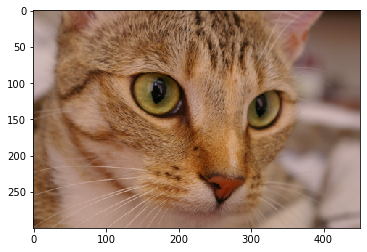

In [118]:
cat = data.chelsea()
plt.imshow(cat)

In [123]:
cat.shape # It has 300*451 px and 3 chanels (RedGreenBlue / RGB)

(300, 451, 3)

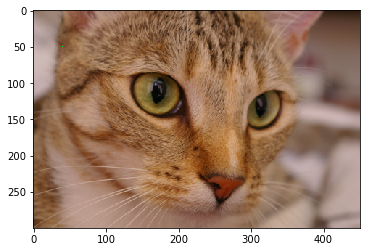

In [129]:
# look at 50th row and 60th column of the pixel. Here we like to set this pixel to something. Remember in our camera image, we used to set something between 0 to 255.
# but in this case, this image is mutichannel so it's vector not scalar.
# now we have 3 values(channel) for each pixel (because the image have 3 channels)

cat[50,40] = [0,255,0]
plt.imshow(cat) # notice green dot 

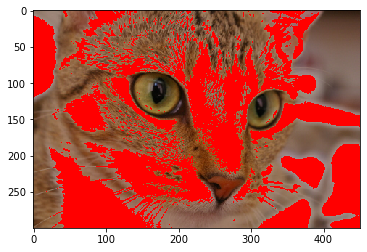

In [137]:
cat = data.chelsea()

# create copy of cat image
red_cat = cat.copy()  
mask = red_cat[:, :, 0] > 160
red_cat[mask] = [255,0,0]
plt.imshow(red_cat)

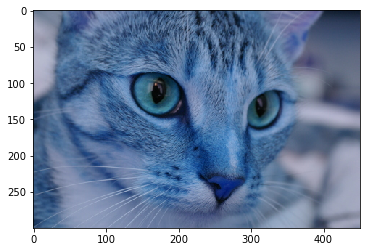

In [140]:
BGR_cat = cat[:,:,::-1]
plt.imshow(BGR_cat)

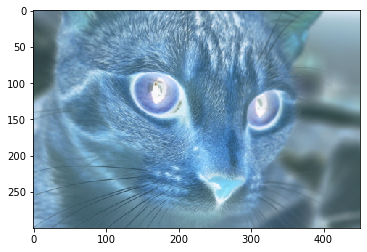

In [143]:
from skimage import util
inverted_cat=util.invert(cat)
plt.imshow(inverted_cat)

### Segmentation

In [145]:
img = data.camera()

In [147]:
img.shape # returns metrix

(512, 512)

In [149]:
img.ravel() #flattens the value of whole matrix in one dimensional vector.

array([156, 157, 160, ..., 121, 113, 111], dtype=uint8)

(array([ 102.,   76.,   89.,  114.,  159.,  209.,  335., 1173., 3523.,
        5129., 4490., 4980., 5762., 6212., 6067., 4480., 2805., 1375.,
         860.,  625.,  498.,  503.,  426.,  430.,  379.,  398.,  418.,
         402.,  358.,  362.,  354.,  349.,  355.,  381.,  371.,  379.,
         348.,  375.,  390.,  398.,  394.,  349.,  327.,  345.,  311.,
         263.,  256.,  279.,  274.,  258.,  258.,  245.,  242.,  261.,
         265.,  268.,  285.,  276.,  334.,  308.,  337.,  309.,  313.,
         370.,  276.,  301.,  245.,  230.,  244.,  242.,  222.,  217.,
         230.,  238.,  235.,  224.,  205.,  220.,  213.,  208.,  164.,
         203.,  222.,  216.,  230.,  243.,  251.,  281.,  315.,  328.,
         334.,  327.,  333.,  381.,  417.,  420.,  473.,  525.,  573.,
         620.,  650.,  687.,  727.,  760.,  803.,  816.,  924.,  986.,
         981., 1002., 1085., 1070., 1174., 1202., 1219., 1190., 1314.,
        1321., 1432., 1399., 1453., 1539., 1477., 1509., 1598., 1592.,
      

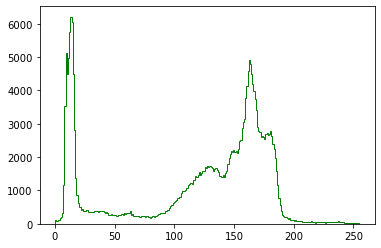

In [156]:
plt.hist(img.ravel(), bins=256, histtype='step', color='green')

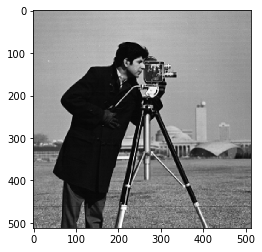

In [158]:
plt.imshow(img,'gray')

#### Work with our image

In [38]:
from skimage import io

colony = io.imread('yeast_colony_array.jpg')

In [40]:
colony

array([[[ 81,  99, 101],
        [ 81,  99, 101],
        [ 79,  97,  99],
        ...,
        [ 87,  96, 103],
        [ 83,  94, 100],
        [ 78,  93,  98]],

       [[ 75,  94,  98],
        [ 76,  95,  99],
        [ 78,  96, 100],
        ...,
        [ 86,  95, 102],
        [ 84,  95, 101],
        [ 82,  97, 102]],

       [[ 73,  92,  98],
        [ 75,  94, 100],
        [ 77,  96, 102],
        ...,
        [ 87,  96, 103],
        [ 86,  97, 103],
        [ 84,  99, 104]],

       ...,

       [[ 81,  91,  93],
        [ 86,  96,  98],
        [ 87,  96, 103],
        ...,
        [ 90, 103, 111],
        [ 88, 101, 109],
        [ 89,  99, 108]],

       [[ 82,  92,  94],
        [ 85,  95,  97],
        [ 85,  94, 101],
        ...,
        [ 90, 103, 111],
        [ 89, 102, 110],
        [ 89,  99, 108]],

       [[ 83,  93,  95],
        [ 84,  93,  98],
        [ 81,  90,  97],
        ...,
        [ 93, 103, 112],
        [ 91, 101, 110],
        [ 89,  99, 108]]

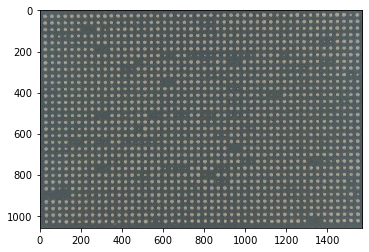

In [43]:
plt.imshow(colony)

In [46]:
# see all 3Dimension of image (row (height) x column (width) x color (3))
colony.shape

(1059, 1571, 3)

In [50]:
# get only one channel of image
colony[:,:,0]

array([[81, 81, 79, ..., 87, 83, 78],
       [75, 76, 78, ..., 86, 84, 82],
       [73, 75, 77, ..., 87, 86, 84],
       ...,
       [81, 86, 87, ..., 90, 88, 89],
       [82, 85, 85, ..., 90, 89, 89],
       [83, 84, 81, ..., 93, 91, 89]], dtype=uint8)

(-0.5, 1570.5, 1058.5, -0.5)

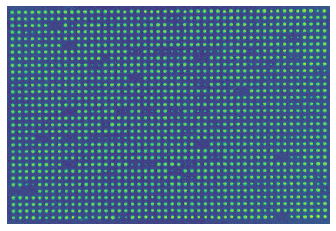

In [76]:
#get rid of the co-ordinates
plt.imshow(colony[:,:,0]) #use 3D slicing
plt.axis('off')

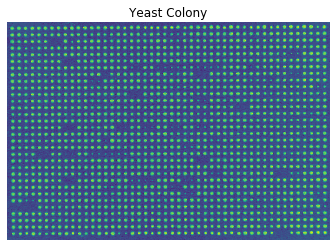

In [77]:
#get rid of the co-ordinates using ";" after "axis()"
plt.imshow(colony[:,:,0])
plt.title('Yeast Colony')
plt.axis('off');

In [164]:
# get only one channel out of 3
from skimage.color import rgb2gray
img = rgb2gray(colony) # this gives black & white image

In [165]:
img.shape # we can see that we lost 2 channels and left with only one channel

(1059, 1571)

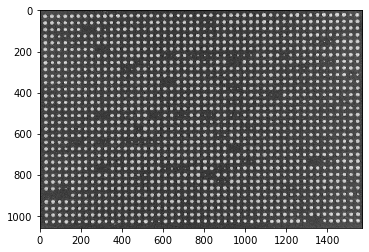

In [168]:
plt.imshow(img, 'gray')

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 3.0000e+00,
        3.0000e+00, 3.0000e+00, 3.0000e+00, 3.0000e+00, 6.0000e+00,
        5.0000e+00, 5.0000e+00, 1.0000e+01, 8.0000e+00, 1.3000e+01,
        1.0000e+01, 1.8000e+01, 2.3000e+01, 2.4000e+01, 3.8000e+01,
        3.6000e+01, 4.4000e+01, 5.3000e+01, 7.9000e+01, 7.2000e+01,
        1.0600e+02, 1.3900e+02, 1.6300e+02, 1.8500e+02, 2.9600e+02,
        3.1400e+02, 4.2100e+02, 5.3700e+02, 6.3300e+02, 8.7300e+02,
        9.8800e+02, 1.3630e+03, 1.6770e+03, 2.2040e+03, 2.8690e+03,
        3.9090e+03, 4.7700e+03, 6.6250e+03, 8.1030e+03, 1.1514e+04,
        1.3839e+04, 1.8908e+04, 2.1922e+04, 2.8697e+04, 3.2789e+04,
        4.7179e+04, 4.5246e+04, 5.8937e+04, 4.9480e+04, 6.5709e+04,
        5.4128e+04, 6.8853e+04, 5.3923e+04, 6.6200e+04, 5.0252e+04,
        6.0009e+04, 4.5320e+04, 5.2406e+04, 3.9171e+04, 4.4554e+04,
        3.3202e+04, 3.7871e+04, 2.6455e+04, 3.15

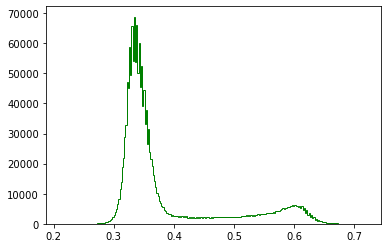

In [170]:
plt.hist(img.ravel(), bins=256, histtype='step', color='green') # In graph darker one reflects the background pixel and the lighter one reflect the 
# are these colonies.